<a href="https://colab.research.google.com/github/Nwosu-Ihueze/Medical-Cost/blob/main/cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Medical Cost in USA

In [1]:
import pandas as pd
import numpy as np

In [2]:
cost_df = pd.read_csv("/insurance.csv")

In [3]:
cost_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
cost_df.shape

(1338, 7)

In [6]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
cost_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
cost_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


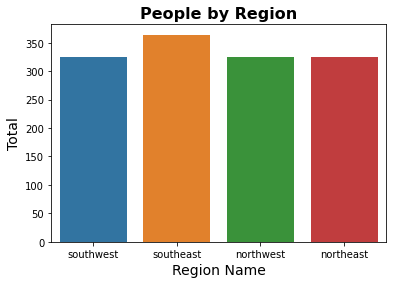

In [11]:
sns.countplot(cost_df['region'])

plt.title('People by Region', fontsize='16', fontweight='bold')
plt.xlabel('Region Name', fontsize='14')
plt.ylabel('Total', fontsize='14')
plt.show()

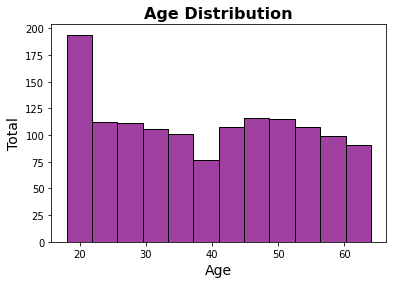

In [13]:
sns.histplot(cost_df['age'], color = 'purple')

plt.title('Age Distribution', fontsize='16', fontweight='bold')
plt.xlabel('Age', fontsize='14')
plt.ylabel('Total', fontsize='14')

plt.show()

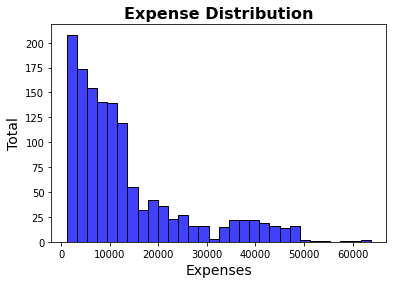

In [14]:
sns.histplot(cost_df['charges'], color = 'blue')

plt.title('Expense Distribution', fontsize='16', fontweight='bold')
plt.xlabel('Expenses', fontsize='14')
plt.ylabel('Total', fontsize='14')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

for k in cost_df.columns:
    if cost_df[k].dtype=='object': 
        enc = LabelEncoder()
        enc.fit(list(cost_df[k].values))
        cost_df[k] = enc.transform(cost_df[k].values)
        
        
cost_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
X = cost_df.drop(['charges'], axis = 1)
y = cost_df['charges']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
model = DecisionTreeRegressor(max_depth = 3)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

score = round(r2_score(y_test,y_predict),1)*100

score

90.0